In [89]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim import corpora, models, similarities
import re
from nltk.tokenize import MWETokenizer



In [90]:
#variables
blog_df = pd.read_csv("CLEANER_CLEAN_BLOG.csv")
#"dictionary" is the corpus dictionary generated when the documents are turned into vectors, it declared later
#stopwords list load into memory
stopwords = [re.sub('\n','', line) for line in open("stopwords.txt")] 
number_of_lda_topics = 20

In [91]:
#sort the csv and drop empty cells 
blog_df['date'] = pd.to_datetime(blog_df['date'])
blog_df = blog_df.dropna(how="any")
blog_df = blog_df.sort_values(by="date")
blog_df.head()

,date,body
36,2005-07-09,You can now add a field for quotDate Recordedq...
38,2005-07-23,Many people have asked us how to put a list of...
35,2005-07-24,You know I really cant believe the pace that w...
33,2005-07-27,Its now possible to put an HTML snippet on you...
40,2005-08-11,We are ecstatic to announce the changes we mad...


In [92]:
#format or gensim using bag-of-words method
blog_df["tokenized_body"] = blog_df["body"].map(lambda paragraph: filter(lambda word: word not in stopwords,paragraph.lower().split(" ")))
#generate the gensim dictionary of all the words in the corpus
#TODO this should be tweaked it is very simplistic, need a topwords list etc.
#special thanks https://stackoverflow.com/questions/36250297/how-to-map-the-word-in-data-frame-to-integer-id-with-python-pandas-and-gensim
dictionary = corpora.Dictionary(blog_df["tokenized_body"])
dictionary.filter_extremes(no_below=1,no_above=1,keep_n=5000)
blog_df["bag_of_words"] = blog_df["tokenized_body"].map(dictionary.doc2bow)
blog_df.head()

,date,body,tokenized_body,bag_of_words
36,2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2..."
38,2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]"
35,2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (..."
33,2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (..."
40,2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (..."


In [93]:
#THIS TAKES A LONG TIME
#make the corpus object for gensim from blog_df
#relevant documentation copied from gensim website
corpus=blog_df["bag_of_words"]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
#latent semeantic indexing
#transform the tf-ldf corpus into a bunch of topixs
#lsi=models.LsiModel(corpus_tfidf,id2word=dictionary, num_topics=200)
#lda is supposed to make more sense
lda = models.ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=number_of_lda_topics, update_every=0, passes=50)
#corpus_lsi = lsi[corpus_tfidf]
#lsi.print_topics(200)
#lda.print_topics(200)


In [94]:
topics = lda.print_topics()
lda.print_topics()

[(0,
  u'0.021*"week" + 0.006*"subscribe" + 0.006*"south" + 0.005*"follow" + 0.003*"fan" + 0.003*"included" + 0.003*"howto" + 0.003*"count" + 0.003*"increasingly" + 0.003*"africa"'),
 (1,
  u'0.008*"entertainment" + 0.007*"manager" + 0.005*"quagliarello" + 0.004*"ive" + 0.004*"mia" + 0.003*"posted" + 0.003*"eye" + 0.003*"league" + 0.003*"ca" + 0.003*"professional"'),
 (2,
  u'0.011*"welcome" + 0.007*"comedy" + 0.006*"film" + 0.006*"sketch" + 0.005*"contest" + 0.004*"festival" + 0.004*"team" + 0.003*"howto" + 0.003*"screens" + 0.003*"dear"'),
 (3,
  u'0.037*"politics" + 0.030*"news" + 0.009*"08" + 0.009*"spotlight" + 0.008*"senator" + 0.008*"choose" + 0.007*"week" + 0.006*"months" + 0.006*"presidential" + 0.005*"ago"'),
 (4,
  u'0.005*"report" + 0.004*"due" + 0.003*"requested" + 0.003*"listened" + 0.003*"guitar" + 0.003*"project" + 0.003*"everyone8217s" + 0.003*"encourage" + 0.003*"call" + 0.003*"college"'),
 (5,
  u'0.007*"recently" + 0.006*"june" + 0.005*"tuesday" + 0.004*"class" + 0.

In [95]:
blog_df["associated_topics"] =  lda.get_document_topics(blog_df["bag_of_words"])

blog_df.head()

,date,body,tokenized_body,bag_of_words,associated_topics
36,2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...","[(11, 0.56769836), (13, 0.36170316), (19, 0.04..."
38,2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]","[(11, 0.27845138), (13, 0.40002352), (19, 0.22..."
35,2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (...","[(0, 0.42355478), (13, 0.44787538), (19, 0.081..."
33,2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (...","[(13, 0.9508834), (19, 0.025432395)]"
40,2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(13, 0.12814136), (17, 0.74200964), (19, 0.10..."


In [96]:
#this is only getting the first topic not the most relevant for testing but 
#it needs to be fixed
#blog_df["main_topic"] =  lda.get_document_topics(blog_df["bag_of_words"]
#i can't tell if this one liner is beautiful or disgusting
#it basically just takes the list of associated topics and pivots it im sure pandas has a better way of doing it
for x in range(number_of_lda_topics):
    blog_df["topic_"+topics[x][1].split("+")[0]] = map(lambda listOfTopics : filter(lambda topic : topic[0]==x ,listOfTopics)[0][1] if len(filter(lambda topic : topic[0]==x ,listOfTopics)) == 1 else 0,blog_df["associated_topics"])
    

blog_df.head()

,date,body,tokenized_body,bag_of_words,associated_topics,"topic_0.021*""week""","topic_0.008*""entertainment""","topic_0.011*""welcome""","topic_0.037*""politics""","topic_0.005*""report""",...,"topic_0.046*""weekday""","topic_0.007*""live""","topic_0.006*""change""","topic_0.010*""videos""","topic_0.035*""team""","topic_0.015*""film""","topic_0.008*""e3""","topic_0.007*""changes""","topic_0.004*""beta""","topic_0.028*"""""
36,2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...","[(11, 0.56769836), (13, 0.36170316), (19, 0.04...",0.000000,0.0,0.0,0.0,0.0,...,0.0,0.567698,0.0,0.361703,0.0,0.0,0.0,0.00000,0.0,0.046987
38,2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]","[(11, 0.27845138), (13, 0.40002352), (19, 0.22...",0.000000,0.0,0.0,0.0,0.0,...,0.0,0.278451,0.0,0.400024,0.0,0.0,0.0,0.00000,0.0,0.227081
35,2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (...","[(0, 0.42355478), (13, 0.44787538), (19, 0.081...",0.423555,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.447875,0.0,0.0,0.0,0.00000,0.0,0.081348
33,2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (...","[(13, 0.9508834), (19, 0.025432395)]",0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.950883,0.0,0.0,0.0,0.00000,0.0,0.025432
40,2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(13, 0.12814136), (17, 0.74200964), (19, 0.10...",0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.128141,0.0,0.0,0.0,0.74201,0.0,0.103287


In [97]:
blog_df.describe()

,"topic_0.021*""week""","topic_0.008*""entertainment""","topic_0.011*""welcome""","topic_0.037*""politics""","topic_0.005*""report""","topic_0.007*""recently""","topic_0.004*""finally""","topic_0.011*""hey""","topic_0.009*""debate""","topic_0.024*""var""","topic_0.046*""weekday""","topic_0.007*""live""","topic_0.006*""change""","topic_0.010*""videos""","topic_0.035*""team""","topic_0.015*""film""","topic_0.008*""e3""","topic_0.007*""changes""","topic_0.004*""beta""","topic_0.028*"""""
count,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,0.015409,0.008919,0.011436,0.042080,0.011238,0.017866,0.007871,0.010284,0.031711,0.014896,0.027087,0.153084,0.054294,0.371710,0.028055,0.030120,0.012697,0.011797,0.009538,0.098218
std,0.071465,0.055985,0.073430,0.139142,0.050282,0.073735,0.048462,0.053991,0.091039,0.081144,0.119609,0.184234,0.099713,0.251701,0.109814,0.113031,0.063843,0.062311,0.057256,0.131366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.157426,0.000000,0.000000,0.000000,0.000000,0.000000,0.026103
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.099241,0.000000,0.409560,0.000000,0.000000,0.000000,0.000000,0.000000,0.052138
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015586,0.000000,0.000000,0.240438,0.073008,0.546288,0.000000,0.000000,0.000000,0.000000,0.000000,0.112755
max,0.731819,0.805000,0.932076,0.926923,0.672222,0.753687,0.826471,0.721086,0.794819,0.766892,0.860140,0.968907,0.733272,0.977260,0.874669,0.930333,0.871130,0.856353,0.773077,0.913636


In [98]:
blog_df.set_index('date')

,body,tokenized_body,bag_of_words,associated_topics,"topic_0.021*""week""","topic_0.008*""entertainment""","topic_0.011*""welcome""","topic_0.037*""politics""","topic_0.005*""report""","topic_0.007*""recently""",...,"topic_0.046*""weekday""","topic_0.007*""live""","topic_0.006*""change""","topic_0.010*""videos""","topic_0.035*""team""","topic_0.015*""film""","topic_0.008*""e3""","topic_0.007*""changes""","topic_0.004*""beta""","topic_0.028*"""""
date,,,,,,,,,,,,,,,,,,,,,
2005-07-09,You can now add a field for quotDate Recordedq...,"[add, field, quotdate, recordedquot, quotlocat...","[(0, 1), (1, 2), (2, 2), (3, 2), (4, 2), (5, 2...","[(11, 0.56769836), (13, 0.36170316), (19, 0.04...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.567698,0.000000,0.361703,0.000000,0.000000,0.000000,0.000000,0.000000,0.046987
2005-07-23,Many people have asked us how to put a list of...,"[people, list, videos, , , people, list, videos]","[(0, 2), (14, 2), (16, 2), (17, 2)]","[(11, 0.27845138), (13, 0.40002352), (19, 0.22...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.278451,0.000000,0.400024,0.000000,0.000000,0.000000,0.000000,0.000000,0.227081
2005-07-24,You know I really cant believe the pace that w...,"[cant, believe, pace, releasing, features, mea...","[(0, 1), (18, 2), (19, 2), (20, 2), (21, 2), (...","[(0, 0.42355478), (13, 0.44787538), (19, 0.081...",0.423555,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.447875,0.000000,0.000000,0.000000,0.000000,0.000000,0.081348
2005-07-27,Its now possible to put an HTML snippet on you...,"[html, snippet, website, automatically, pulls,...","[(0, 1), (13, 2), (14, 6), (26, 4), (27, 2), (...","[(13, 0.9508834), (19, 0.025432395)]",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.950883,0.000000,0.000000,0.000000,0.000000,0.000000,0.025432
2005-08-11,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 3), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(13, 0.12814136), (17, 0.74200964), (19, 0.10...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.128141,0.000000,0.000000,0.000000,0.742010,0.000000,0.103287
2005-08-21,How goes it folks We have added a ton of new f...,"[goes, folks, added, ton, features, site, , go...","[(0, 1), (20, 2), (29, 2), (49, 2), (50, 2), (...","[(5, 0.43208516), (13, 0.42816064), (19, 0.079...",0.000000,0.000000,0.000000,0.000000,0.000000,0.432085,...,0.000000,0.000000,0.000000,0.428161,0.000000,0.000000,0.000000,0.000000,0.000000,0.079040
2005-09-12,We are ecstatic to announce the changes we mad...,"[ecstatic, announce, changes, site, night, res...","[(0, 1), (29, 2), (37, 2), (38, 4), (39, 2), (...","[(13, 0.14820448), (17, 0.78663945), (19, 0.03...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.148204,0.000000,0.000000,0.000000,0.786639,0.000000,0.036823
2005-10-25,Its been awhile since our last update but weve...,"[awhile, update, weve, busy, bringing, lots, f...","[(0, 2), (20, 2), (53, 2), (54, 4), (55, 2), (...","[(0, 0.19975117), (13, 0.65785176), (19, 0.114...",0.199751,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.657852,0.000000,0.000000,0.000000,0.000000,0.000000,0.114978
2005-11-07,end block,[block],"[(64, 1)]","[(0, 0.025), (1, 0.025), (2, 0.025), (3, 0.025...",0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.525000,0.025000,0.025000


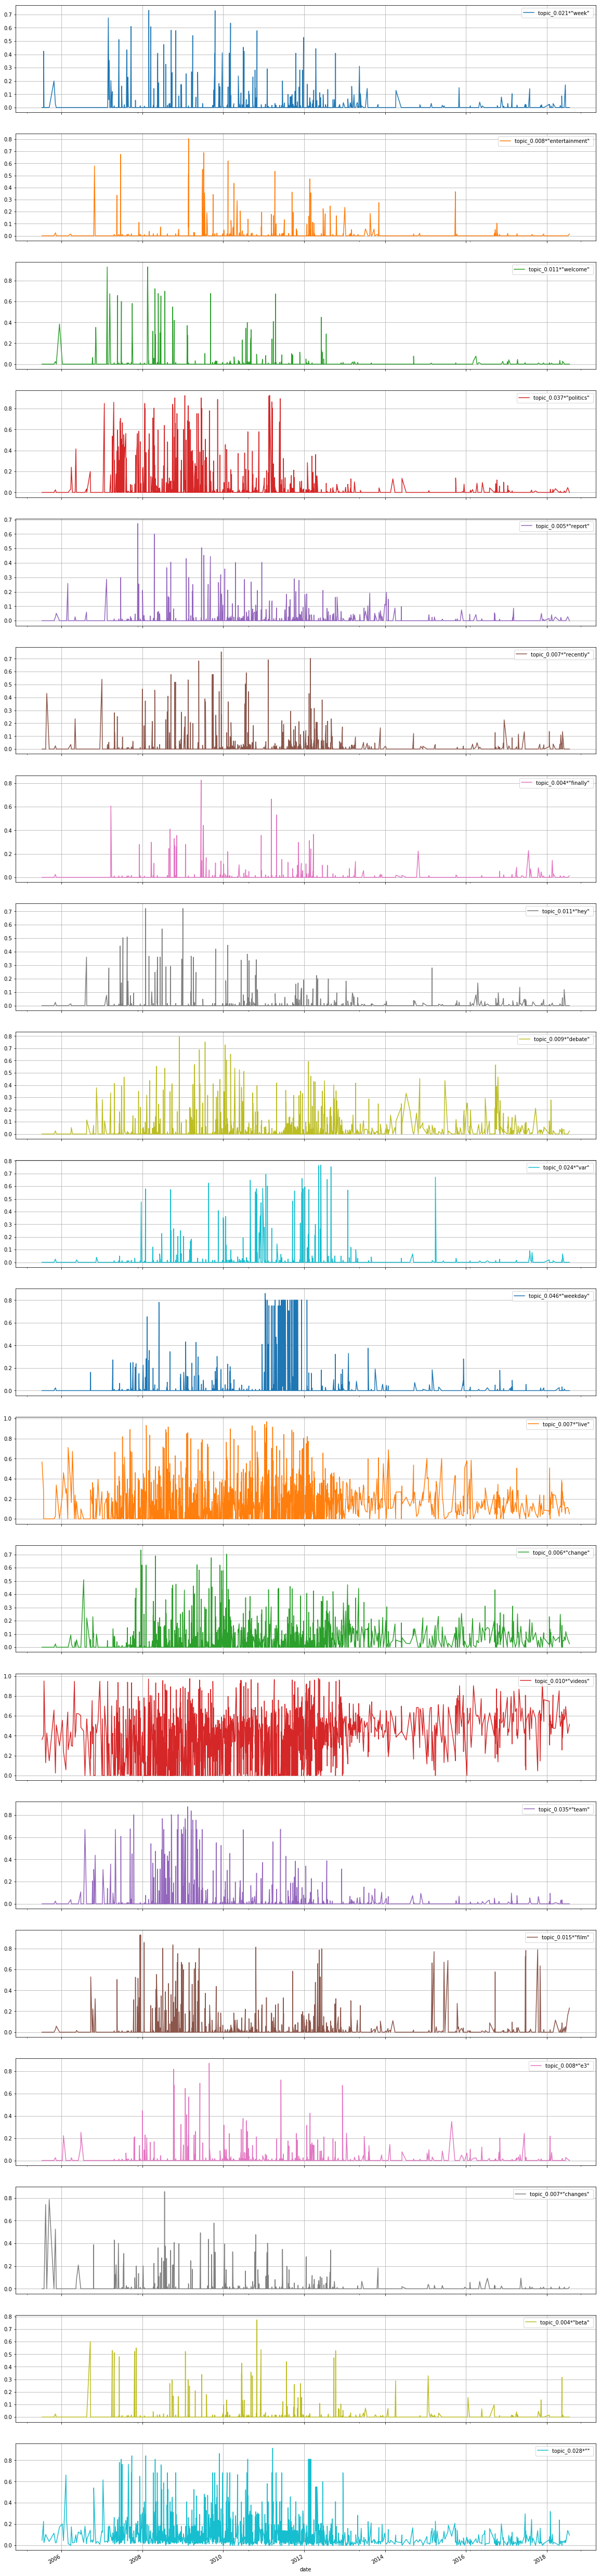

In [99]:
blog_df.plot.line(x="date",y=[x+5 for x in  range(number_of_lda_topics)],subplots=True,figsize=(20,100),grid=True)
plt.savefig("topics.pdf")